Table of Contents
1. Introduction
2. Dataset Overview
3. Data Cleaning
4. Exploratory Data Analysis
   - User Activity
   - Time-Based Analysis
   - Word Frequency
5. Conclusion

1. # Introduction

This analysis explores a WhatsApp group chat using Python to uncover communication patterns, user behavior, and overall activity. It uses a CSV export of chat messages, focusing on who talks the most, when people are most active, and what words are frequently used.

The analysis includes:
- Data cleaning and preprocessing
- Visualizations of user and time-based activity
- Word frequency analysis



Setting Up my notebook:

In [ ]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Optional for better-looking plots
sns.set(style="whitegrid")


2. Dataset Overview

The dataset contains messages extracted from a WhatsApp group. It includes the following columns:

- **User**: Sender of the message
- **Message**: Message content
- **Year, Month, Day, Hour, Minute**: Timestamp components


Load and preview of the dataset:

In [11]:
df = pd.read_csv("WhatsApp.csv")
df.head()

,user,message,year,month,day,hour,minute
0,group_notification,Messages and calls are end-to-end encrypted. N...,2021,March,27,0,0
1,group_notification,"Group creator created group ""JGEC MECH 2K17-21""\n",2018,January,8,16,43
2,group_notification,You were added\n,2018,January,8,16,43
3,+91 95648 92981,Keo clg jabi?\n,2021,March,26,21,41
4,+91 6296 534 775,Kobe bol??\n,2021,March,26,21,46


3. Data Cleaning

Before analysis, we clean the data to:
- Remove system messages (e.g., "user left the group")
- Drop empty messages
- Combine timestamp components into a single datetime field


In [5]:
# Remove system messages and empty rows
df_cleaned = df[(df["user"] != "group_notification") & (df["message"].notna())].copy()

# Convert 'month' from name to number
df_cleaned["datetime"] = pd.to_datetime(
    df_cleaned[["year", "day", "hour", "minute"]].assign(
        month=pd.to_datetime(df_cleaned["month"], format="%B").dt.month
    )
)

# Add weekday column
df_cleaned["weekday"] = df_cleaned["datetime"].dt.day_name()

df_cleaned.head()


,user,message,year,month,day,hour,minute,datetime,weekday
3,+91 95648 92981,Keo clg jabi?\n,2021,March,26,21,41,2021-03-26 21:41:00,Friday
4,+91 6296 534 775,Kobe bol??\n,2021,March,26,21,46,2021-03-26 21:46:00,Friday
5,+91 95648 92981,Recently\n,2021,March,26,21,46,2021-03-26 21:46:00,Friday
6,+91 95648 92981,Tui bol Kobe jete chas\n,2021,March,26,21,47,2021-03-26 21:47:00,Friday
7,+91 6296 534 775,Exam sesh er por jabo\n,2021,March,26,21,47,2021-03-26 21:47:00,Friday


4. Exploratory Data Analysis:

A. Most Active Users

This bar graph shows the top 10 users based on the number of messages they sent in the group.


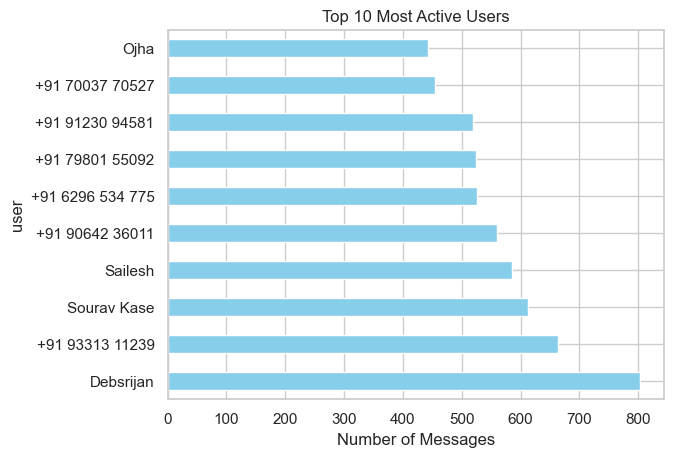

In [6]:
df_cleaned["user"].value_counts().head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Most Active Users")
plt.xlabel("Number of Messages")
plt.show()


B. Hourly Activity

This graph shows the distribution of messages by hour of the day, revealing peak chat hours.


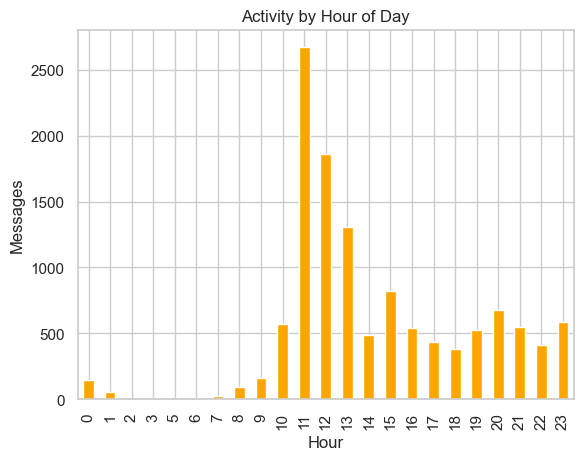

In [12]:
df_cleaned["hour"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Activity by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Messages")
plt.show()


C. Weekly Activity

This bar chart shows how message volume varies by day, helping identify weekday vs weekend activity.


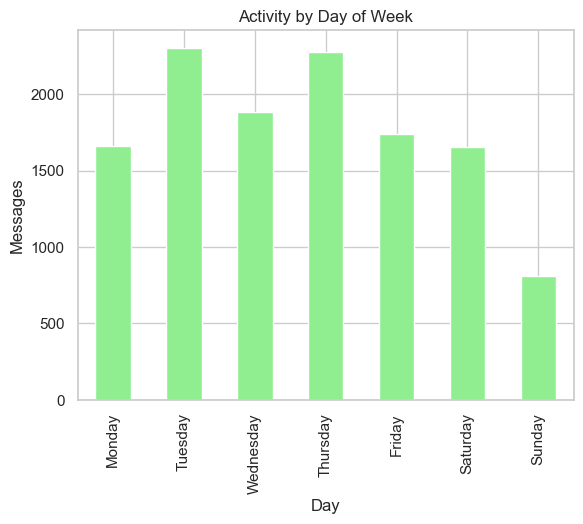

In [8]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_cleaned["weekday"].value_counts().reindex(order).plot(kind="bar", color="lightgreen")
plt.title("Activity by Day of Week")
plt.xlabel("Day")
plt.ylabel("Messages")
plt.show()


D. Most Common Words

This analysis reveals the most frequently used words in the chat. Common punctuation is removed, and only words longer than 2 characters are considered.


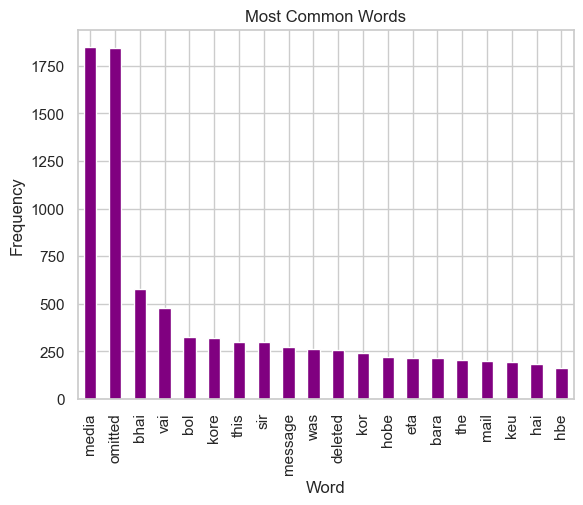

In [9]:
def clean_text(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

words = " ".join(df_cleaned["message"]).split()
words = [clean_text(word) for word in words if len(word) > 2]

common_words = Counter(words).most_common(20)

# Convert to DataFrame and plot
pd.DataFrame(common_words, columns=["Word", "Count"]).set_index("Word").plot(
    kind="bar", legend=False, color="purple")
plt.title("Most Common Words")
plt.ylabel("Frequency")
plt.show()


E. Messages Over Time

This time series visualization shows the volume of messages sent per day in the WhatsApp group.

It helps to identify trends, spikes, or periods of inactivity. Peaks might indicate special events, holidays, or heated discussions, while dips could represent weekends, exams, or general inactivity.


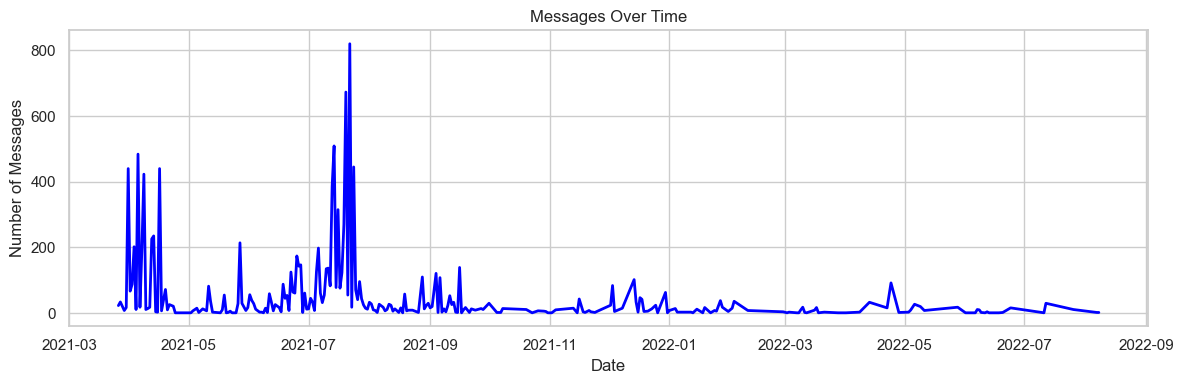

In [13]:
# Group messages by date
messages_per_day = df_cleaned.groupby(df_cleaned["datetime"].dt.date).size()

# Plot the message count over time
plt.figure(figsize=(12, 4))
messages_per_day.plot(color="blue", linewidth=2)
plt.title("Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.tight_layout()
plt.show()


5. Conclusion

This WhatsApp chat analysis revealed useful insights such as:

- The most active user is: **[Debsrijan]**
- The peak chat time is: **[11:00-12:00]**
- Most messages are sent on: **[Tuesday, Thursday]**
- Frequently used words include: **[media, omitted, bhai]**

The project demonstrated the use of Python libraries like Pandas, Matplotlib, and Seaborn to clean, analyze, and visualize text data.
